Install pyimagequality ranking package

In [2]:
!pip install git+https://github.com/sakoho81/pyimagequalityranking.git
!pip install seaborn

  Cloning https://github.com/sakoho81/pyimagequalityranking.git to c:\users\schatzm\appdata\local\temp\pip-req-build-cxravqav
  Resolved https://github.com/sakoho81/pyimagequalityranking.git to commit 094b0b9f79f7f78853a79d71be686f91491e0574
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/sakoho81/pyimagequalityranking.git 'C:\Users\schatzm\AppData\Local\Temp\pip-req-build-cxravqav'


Apply image quality ranking in analyze and plot mode. The result in form of ranked list will be in csv in subfolder.

In [3]:
!pyimq.main --mode=directory --mode=analyze --mode=plot \
--working-directory=HeLa_24h_BEA --normalize-power --result=fstd

Mode option is ['directory', 'analyze', 'plot']
Done analyzing Cy3_20230301_B2-10_01.tif
Done analyzing Cy3_20230301_B2-11_01.tif
Done analyzing Cy3_20230301_B2-12_01.tif
Done analyzing Cy3_20230301_B2-13_01.tif
Done analyzing Cy3_20230301_B2-14_01.tif
Done analyzing Cy3_20230301_B2-15_01.tif
Done analyzing Cy3_20230301_B2-16_01.tif
Done analyzing Cy3_20230301_B2-1_01.tif
Done analyzing Cy3_20230301_B2-2_01.tif
Done analyzing Cy3_20230301_B2-3_01.tif
Done analyzing Cy3_20230301_B2-4_01.tif
Done analyzing Cy3_20230301_B2-5_01.tif
Done analyzing Cy3_20230301_B2-6_01.tif
Done analyzing Cy3_20230301_B2-7_01.tif
Done analyzing Cy3_20230301_B2-8_01.tif
Done analyzing Cy3_20230301_B2-9_01.tif
Done analyzing Cy3_20230301_B3-10_01.tif
Done analyzing Cy3_20230301_B3-11_01.tif
Done analyzing Cy3_20230301_B3-12_01.tif
Done analyzing Cy3_20230301_B3-13_01.tif
Done analyzing Cy3_20230301_B3-14_01.tif
Done analyzing Cy3_20230301_B3-15_01.tif
Done analyzing Cy3_20230301_B3-16_01.tif
Done analyzing Cy3

The analysis uses only one parameter, the frequency domain STD, to rank the images, and thus enabling spatial masking is not necessary here. You will see that the out-of-focus images are clearly at the end of the ranking, and the degree of blurriness correlates well with the ranking value.

The file 56 is blurred and ranked at the end with fSTD of 241. The in focus images have fSTD of over 3000.

In [4]:
import pandas as pd
import seaborn as sns

# spcify paht to created csv
df = pd.read_csv("HeLa_24h_BEA/2023-03-14_PyIQ_output/12-46-00_PyIQ_analyze_out.csv");
df

,Filename,tEntropy,tBrenner,fMoments,fMean,fSTD,fEntropy,fTh,fMaxPw,Skew,...,SpectMean,SpectSTDNorm,InvSpectSTDNorm,SpectEntNorm,SkewNorm,KurtosisNorm,SpectHighPowerNorm,MeanBinNorm,BrennerNorm,SpectMomentsNorm
0,HeLa_24h_BEA\Cy3_20230301_D2-5_01.tif,0.024533,1275230.0,99.681920,928.128009,428.951849,4.609025,2.471014e+09,571.259772,0.796190,...,0.905504,1.000000,0.000000,0.854134,0.647552,0.089118,0.803806,0.816375,0.010598,0.918943
1,HeLa_24h_BEA\Cy3_20230301_G2-15_01.tif,0.017101,1359282.0,96.574777,1024.985466,417.035844,4.203982,2.418440e+09,701.254659,1.130413,...,1.000000,0.972221,0.027779,0.779072,0.499602,0.661174,0.986719,1.000000,0.011296,0.890299
2,HeLa_24h_BEA\Cy3_20230301_D3-12_01.tif,0.033212,1344739.0,108.474506,763.496578,326.873837,4.840197,2.456182e+09,480.962372,0.807586,...,0.744885,0.762029,0.237971,0.896974,0.642507,0.057785,0.676751,0.603162,0.011175,1.000000
3,HeLa_24h_BEA\Cy3_20230301_D2-12_01.tif,0.029075,1317288.0,94.011469,721.056854,296.947500,4.559767,2.432818e+09,478.558218,0.934717,...,0.703480,0.692263,0.307737,0.845006,0.586230,0.213063,0.673368,0.592826,0.010947,0.866669
4,HeLa_24h_BEA\DAPI_20230301_E2-1_01.tif,3.478737,33839460.0,50.993756,427.484847,295.043546,4.241785,2.589873e+09,213.708236,0.985975,...,0.417064,0.687824,0.312176,0.786078,0.563540,0.495155,0.300704,0.547416,0.281223,0.470099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,HeLa_24h_BEA\DAPI_20230301_B3-14_01.tif,1.013120,1740937.0,1.586884,133.095693,1.917515,5.064580,2.273333e+09,131.855990,0.287629,...,0.129851,0.004470,0.995530,0.938556,0.872675,0.014137,0.185532,0.051414,0.014468,0.014629
284,HeLa_24h_BEA\DAPI_20230301_B3-11_01.tif,2.071979,1385542.0,0.820195,157.212583,1.905094,5.103941,2.270810e+09,157.352323,-0.059049,...,0.153380,0.004441,0.995559,0.945851,0.973861,0.032378,0.221407,0.059817,0.011515,0.007561
285,HeLa_24h_BEA\DAPI_20230301_B3-12_01.tif,2.833472,1632960.0,0.684856,132.637072,1.902468,5.076377,2.273333e+09,131.985374,0.109079,...,0.129404,0.004435,0.995565,0.940743,0.951714,0.005977,0.185714,0.051571,0.013571,0.006314
286,HeLa_24h_BEA\DAPI_20230301_B3-7_01.tif,1.872757,1297566.0,0.797757,156.827745,1.739777,5.129581,2.270810e+09,157.324915,0.013594,...,0.153005,0.004056,0.995944,0.950602,0.993982,0.002935,0.221368,0.059230,0.010783,0.007354


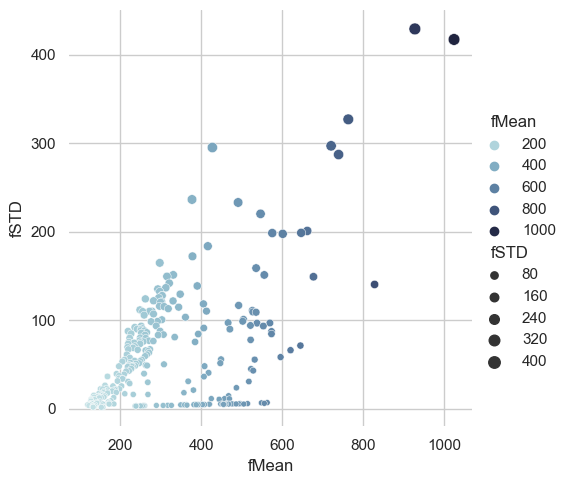

In [5]:
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x="fMean", y="fSTD",
    hue="fMean", size="fSTD",
    palette=cmap,
)
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [10]:
!pip install -r requirements.txt --quiet

In [33]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
import numpy as np
# data = pd.DataFrame(X)
data = df[["fMean","fSTD"]]
data=data.assign(Cluster=np.nan)

C:\Users\schatzm\AppData\Local\Temp\ipykernel_27652\2770472926.py:41: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  g = sns.relplot(


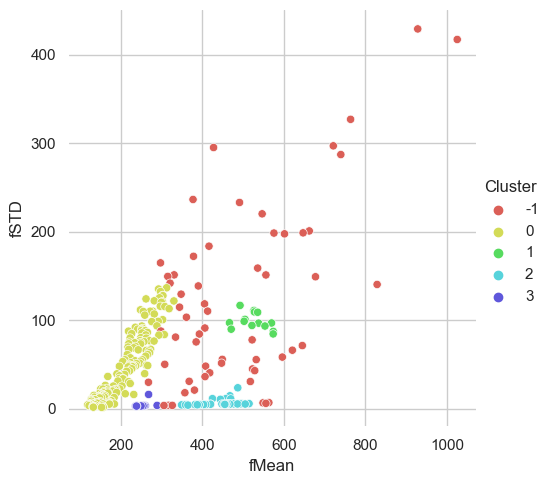

In [47]:


# Step 3 - Using StandardScaler and Clustering
# StandardScaler is used to remove the outliners and scale the data by making the mean of the data 0 and standard deviation as 1. So we are creating an object std_scl to use standardScaler.

std_slc = StandardScaler()
X_std = std_slc.fit_transform(data)

# We are using DBSCAN as a model and we have trained it by using the data we get after standerd scaling. Then we predicted the clusters and stored it in a dataframe.

clt = DBSCAN(eps=0.3, min_samples=10)


# epsfloat, default=0.5
# The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

# min_samplesint, default=5
# The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

# metricstr, or callable, default=’euclidean’
# The metric to use when calculating distance between instances in a feature array. If metric is a string or callable, it must be one of the options allowed by sklearn.metrics.pairwise_distances for its metric parameter. If metric is “precomputed”, X is assumed to be a distance matrix and must be square. X may be a sparse graph, in which case only “nonzero” elements may be considered neighbors for DBSCAN.


model = clt.fit(X_std)

clusters = pd.DataFrame(model.fit_predict(X_std))
data["Cluster"] = clusters

# Step 4 - Visualising the clusters
# Here we are ploting scatterplot of the dataset and marking clusters in same colors.

# fig = plt.figure(figsize=(10,10)); ax = fig.add_subplot(111)
# scatter = ax.scatter(data[0],data[1], c=data["Cluster"],s=50)
# ax.set_title("DBSCAN Clustering")
# ax.set_xlabel("X0")
# ax.set_ylabel("X1")
# plt.colorbar(scatter)
# plt.show()

sns.set_theme(style="whitegrid")

cmap = sns.hls_palette()
g = sns.relplot(
    data=data,
    x="fMean", y="fSTD",
    hue="Cluster",
    palette=cmap,
)
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [48]:
df=df.assign(Cluster=data.Cluster)

In [49]:
df

,Filename,tEntropy,tBrenner,fMoments,fMean,fSTD,fEntropy,fTh,fMaxPw,Skew,...,SpectSTDNorm,InvSpectSTDNorm,SpectEntNorm,SkewNorm,KurtosisNorm,SpectHighPowerNorm,MeanBinNorm,BrennerNorm,SpectMomentsNorm,Cluster
0,HeLa_24h_BEA\Cy3_20230301_D2-5_01.tif,0.024533,1275230.0,99.681920,928.128009,428.951849,4.609025,2.471014e+09,571.259772,0.796190,...,1.000000,0.000000,0.854134,0.647552,0.089118,0.803806,0.816375,0.010598,0.918943,-1
1,HeLa_24h_BEA\Cy3_20230301_G2-15_01.tif,0.017101,1359282.0,96.574777,1024.985466,417.035844,4.203982,2.418440e+09,701.254659,1.130413,...,0.972221,0.027779,0.779072,0.499602,0.661174,0.986719,1.000000,0.011296,0.890299,-1
2,HeLa_24h_BEA\Cy3_20230301_D3-12_01.tif,0.033212,1344739.0,108.474506,763.496578,326.873837,4.840197,2.456182e+09,480.962372,0.807586,...,0.762029,0.237971,0.896974,0.642507,0.057785,0.676751,0.603162,0.011175,1.000000,-1
3,HeLa_24h_BEA\Cy3_20230301_D2-12_01.tif,0.029075,1317288.0,94.011469,721.056854,296.947500,4.559767,2.432818e+09,478.558218,0.934717,...,0.692263,0.307737,0.845006,0.586230,0.213063,0.673368,0.592826,0.010947,0.866669,-1
4,HeLa_24h_BEA\DAPI_20230301_E2-1_01.tif,3.478737,33839460.0,50.993756,427.484847,295.043546,4.241785,2.589873e+09,213.708236,0.985975,...,0.687824,0.312176,0.786078,0.563540,0.495155,0.300704,0.547416,0.281223,0.470099,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,HeLa_24h_BEA\DAPI_20230301_B3-14_01.tif,1.013120,1740937.0,1.586884,133.095693,1.917515,5.064580,2.273333e+09,131.855990,0.287629,...,0.004470,0.995530,0.938556,0.872675,0.014137,0.185532,0.051414,0.014468,0.014629,0
284,HeLa_24h_BEA\DAPI_20230301_B3-11_01.tif,2.071979,1385542.0,0.820195,157.212583,1.905094,5.103941,2.270810e+09,157.352323,-0.059049,...,0.004441,0.995559,0.945851,0.973861,0.032378,0.221407,0.059817,0.011515,0.007561,0
285,HeLa_24h_BEA\DAPI_20230301_B3-12_01.tif,2.833472,1632960.0,0.684856,132.637072,1.902468,5.076377,2.273333e+09,131.985374,0.109079,...,0.004435,0.995565,0.940743,0.951714,0.005977,0.185714,0.051571,0.013571,0.006314,0
286,HeLa_24h_BEA\DAPI_20230301_B3-7_01.tif,1.872757,1297566.0,0.797757,156.827745,1.739777,5.129581,2.270810e+09,157.324915,0.013594,...,0.004056,0.995944,0.950602,0.993982,0.002935,0.221368,0.059230,0.010783,0.007354,0


In [50]:
# saving the DataFrame as a CSV file
gfg_csv_data = df.to_csv('Clustered_results.csv', index = True)
print('\nCSV String:\n', gfg_csv_data)


CSV String:
 None
